This is 2nd and last notebook for Week 2.
It implements multiclass classification that recognizes handwritten numbers 0-10
* Multiclass
* ReLU activation
* Softmax =  output is linear -> enable logits

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2023-07-21 15:24:30.938396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Inputs

In [2]:
x_train = np.load("handwritten_X.npy")
y_train = np.load("handwritten_Y.npy")

x_train.shape, y_train.shape

((5000, 400), (5000, 1))

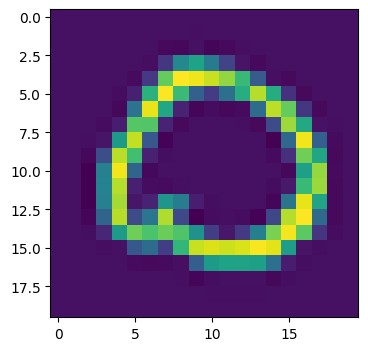

In [3]:
x = np.arange(0,20,1)
y = np.arange(0,20,1)

example0 = np.reshape(x_train[100], (20,20), order='F')

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(example0)

# Model

The neural network yis shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="./images/C2_W2_Assigment_NN.png" width="400" height="150">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention: 
               

In [4]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(400,)),
    tf.keras.layers.Dense(units = 25, activation="relu", name="L1"),
    tf.keras.layers.Dense(units = 15, activation="relu", name="L2"),
    tf.keras.layers.Dense(units = 10, activation="linear", name="L3"),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [7]:
history = model.fit(x_train, y_train,
          epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.5913
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.6632
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3446
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3000
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2466
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2228
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2068
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1951
Epoch 11/40
157/157 [==============================] - 0s 3ms/step - loss: 0.1817
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 13/40
157/157 [====

# Loss

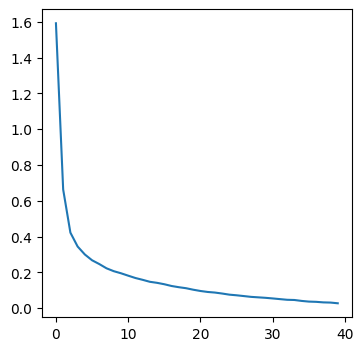

In [8]:
loss = history.history['loss']
fix, ax = plt.subplots(figsize=(4,4))
ax.plot(loss)

# Prediction

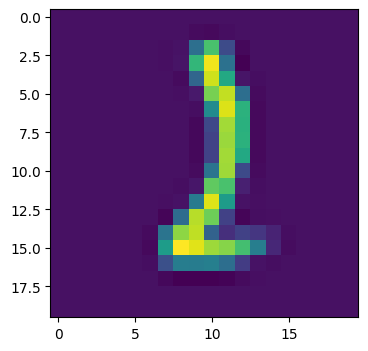

In [9]:
example2 = np.reshape(x_train[1015],(20,20), order='F')

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(example2)

In [31]:
prediction = model.predict(x_train[1015].reshape(1,400))
prediction_p_t = tf.nn.softmax(prediction)
prediction_p = prediction_p_t.numpy()

1/1 [==============================] - 0s 40ms/step


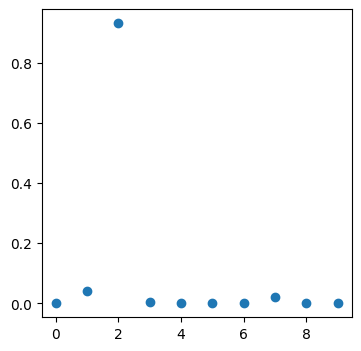

In [45]:
x = np.arange(1,11,1).reshape(1,10)
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x-1,prediction_p)